# QS World University Rankings 2024
This data set of the [QS World University Rankings of 2024](https://www.kaggle.com/datasets/joebeachcapital/qs-world-university-rankings-2024) is taken from Kaggle.

A short blurb taken from the source: 

> The 20th edition of the QS World University Rankings features 1,500 institutions across 104 locations and is the only ranking of its kind to emphasise employability and sustainability. This year, they have implemented the largest-ever methodological enhancement, introducing three new metrics: Sustainability, Employment Outcomes and International Research Network.

THe original data set can also be found at [qs.com](https://www.qs.com) [here](https://www.qs.com/portfolio-items/qs-world-university-rankings-2024/?portfolioCats=1927%2C2037)

## Goal
The goal of this study is to visualize and become familiar with the QS World University Ranking data set.
- See the distribution of schools by region. I.e see how many of the top 100 schools are from the US.
- See the distribution of school classifications, including school size, focus, research, age, and status.
- Compare scores of various categories to show why a school may be ahead in terms of ranking

## Step 0: Exploring the Data Set
Let's first look at what the data set has to offer.

In [438]:
import pandas as pd
import numpy as np

df = pd.read_csv('Data/QsWorldUniversityRankings2024.csv')
print("# of Columns:", len(df.columns))
print("Columns:", df.columns)
print("# of Rows:", len(df))


df.head(5)

# of Columns: 29
Columns: Index(['2024 RANK', '2023 RANK', 'Institution Name', 'Country Code', 'Country',
       'SIZE', 'FOCUS', 'RES.', 'AGE', 'STATUS', 'Academic Reputation Score',
       'Academic Reputation Rank', 'Employer Reputation Score',
       'Employer Reputation Rank', 'Faculty Student Score',
       'Faculty Student Rank', 'Citations per Faculty Score',
       'Citations per Faculty Rank', 'International Faculty Score',
       'International Faculty Rank', 'International Students Score',
       'International Students Rank', 'International Research Network Score',
       'International Research Network Rank', 'Employment Outcomes Score',
       'Employment Outcomes Rank', 'Sustainability Score',
       'Sustainability Rank', 'Overall SCORE'],
      dtype='object')
# of Rows: 1498


,2024 RANK,2023 RANK,Institution Name,Country Code,Country,SIZE,FOCUS,RES.,AGE,STATUS,...,International Faculty Rank,International Students Score,International Students Rank,International Research Network Score,International Research Network Rank,Employment Outcomes Score,Employment Outcomes Rank,Sustainability Score,Sustainability Rank,Overall SCORE
0,rank display,rank display2,institution,location code,location,size,focus,research,age band,status,...,ifr rank,isr score,isr rank,irn score,irn rank,ger score,ger rank,SUS SCORE,SUS RANK,Overall Score
1,1,1,Massachusetts Institute of Technology (MIT),US,United States,M,CO,VH,5,B,...,56,88.2,128,94.3,58,100,4,95.2,51,100.0
2,2,2,University of Cambridge,UK,United Kingdom,L,FC,VH,5,A,...,64,95.8,85,99.9,7,100,6,97.3,33=,99.2
3,3,4,University of Oxford,UK,United Kingdom,L,FC,VH,5,A,...,110,98.2,60,100.0,1,100,3,97.8,26=,98.9
4,4,5,Harvard University,US,United States,L,FC,VH,5,B,...,210,66.8,223,100.0,5,100,1,96.7,39,98.3


Here is an overall breakdown off the columns
1. 2024 Rank
2. 2023 Rank
3. Institution Name
4. Country Code
5. Country
6. Size 
7. Focus
8. Res
9. Age
10. Status
11. Academic Reputation Score
12. Academic Reputation Rank
13. Employer Reputation Score
14. Employer Reuptation Rank
15. Faculty Student Score
16. Faculty Student Rank
17. Citations per Faculty Score
18. Citations per Faculty Rank
19. International Faculty Score
20. International Faculty Rank
21. International Students Score
22. International Students Rank
23. International Research Network Score
24. International Research Network Rank
25. Employment Outcomes Score
26. Employment Outcomes Rank
27. Sustainability Score
28. Sustainability Rank
29. Overall Score

## Step 1: Data Cleaning and Wrangling.
First, lets get a priliminary look at our data,then let's clean our data. At first glance, there is a couple things we can notice.
1. Remove an extra row of column headers.
2. Data in numerical columns like `Rank` columns are currently strings. This is since the dataset uses `=` to represent multiple schools having the same value. For example, both Peiking and Princeton are ranked 17th, represented by `17th`. Let's remove this and simply make them both `17` by removing non-numerical characters. After row 606, the values for the `2024`  rank are represented by certain range of values. For example, Drexel University is given the ranking value `601-610`. This is ambiguous data. *But perhaps, we can help complete it by writing a ML to guess the actual rank based on the score?*
3. Rankings for columns like `Academic Reuptation Rank` stop precise ranking after the 601st and is labeled with `601+`. For `Citations Per Faculty Rank`, precise ranking stops after `701+`
4. Another problem is that, after about entry 500, columns with score and rank start to have missing values. There a couple ways to handle this.
  - We can simply just consider the top 500 schools. (For simplicity this is chosen)
  - We can replace empty values with the mean/median scores/ranks of other schools that have about the same overall ranking. (Is the best if we need exact data for all schools)
  - Remove rows with data missing. 
5. (OPTIONAL) Remove the `2023 RANK` Column. We our mainly analyzing 2024 and our table currently doesn't contain any other 2023 related data. Perhaps a future project would be to compare 2023 and 2024, and target reasons for higher weight, i.e. which variables pushed a school to have a higher ranking.


Our data set is not really that complete. For example, after the 400th row / entry, there are lots empty values for certain columns, especially the columns with `Rank` and `Score`. Perhaps another time, we can do a full clean to get a more prestine data set using various data cleaning techniques. 

In this case, we will simply use the top 300, so we can avoid some of these problems and quickly use some EDA to get a better understanding of the data set.

In [439]:
# Step 0: look at only top 300 schools
df = df[:300]

# Step 1: drop the extra column headers
df.drop(labels=[0], axis=0, inplace=True) # Step 1: drop the extra column headers
df.reset_index(inplace=True) # reset the index

score_col = [
    "Academic Reputation Score",
    "Employer Reputation Score",
    "Faculty Student Score",
    "Citations per Faculty Score",
    "International Faculty Score",
    "International Students Score",
    "International Research Network Score",
    "Employment Outcomes Score",
    "Sustainability Score"
]

rank_col = [
    "Academic Reputation Rank",
    "Employer Reputation Rank",
    "Faculty Student Rank",
    "Citations per Faculty Rank",
    "International Faculty Rank",
    "International Students Rank",
    "International Research Network Rank",
    "Employment Outcomes Rank",
    "Sustainability Rank"
]

# Step 2: set score values to float
def make_col_float(score_type):
    return df[score_type].astype(float)

for col in score_col:
    df[col] = make_col_float(col)

# Step 3: remove non numerical values f
import re
def remove_non_numeric(value):
    return re.sub(r'[^0-9]', '', value)

# Remove all non numeric characters, I.e 701+ is just 701
for col in rank_col:
    df[col] = df[col].apply(remove_non_numeric)
    df[col] = df[col].astype(float)

# Overall Score has some '-' as well. 
df['Overall SCORE'] = df['Overall SCORE'].apply(remove_non_numeric)
df['Overall SCORE'] = df['Overall SCORE'].astype(float)

df.head()

,index,2024 RANK,2023 RANK,Institution Name,Country Code,Country,SIZE,FOCUS,RES.,AGE,...,International Faculty Rank,International Students Score,International Students Rank,International Research Network Score,International Research Network Rank,Employment Outcomes Score,Employment Outcomes Rank,Sustainability Score,Sustainability Rank,Overall SCORE
0,1,1,1,Massachusetts Institute of Technology (MIT),US,United States,M,CO,VH,5,...,56.0,88.2,128.0,94.3,58.0,100.0,4.0,95.2,51.0,1000.0
1,2,2,2,University of Cambridge,UK,United Kingdom,L,FC,VH,5,...,64.0,95.8,85.0,99.9,7.0,100.0,6.0,97.3,33.0,992.0
2,3,3,4,University of Oxford,UK,United Kingdom,L,FC,VH,5,...,110.0,98.2,60.0,100.0,1.0,100.0,3.0,97.8,26.0,989.0
3,4,4,5,Harvard University,US,United States,L,FC,VH,5,...,210.0,66.8,223.0,100.0,5.0,100.0,1.0,96.7,39.0,983.0
4,5,5,3,Stanford University,US,United States,L,FC,VH,5,...,78.0,51.2,284.0,95.8,44.0,100.0,2.0,94.4,63.0,981.0


## Step 2: Explanatory Data Analysis
Let's begin with some simple charts to visualize the data. First let's see where these schools are from. Since there are too many, we can first just plot the top 10.


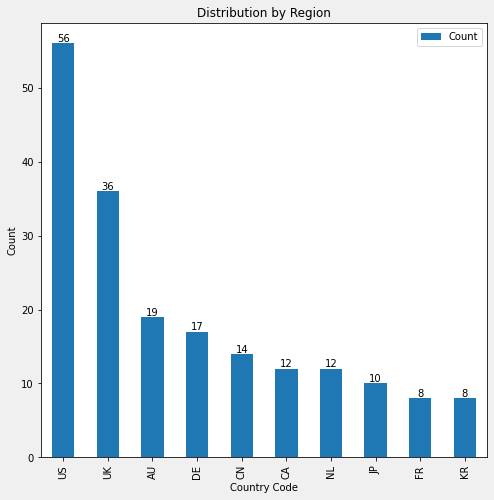

<Figure size 432x288 with 0 Axes>

In [440]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Up
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8,8))
fig.set_facecolor('#f0f0f0') 

# Country
country_code = df['Country Code'].value_counts().reset_index()
country_code.columns = ['Country Code', 'Count']
# country_code.sort_values(by='Country Code', ascending=False, inplace=True)

# Practice: Aquire Country Code names
country_code_country_map = df[['Country Code', 'Country']]
country_code_country_map = country_code_country_map.drop_duplicates(subset='Country') 
merged_df = country_code.merge(country_code_country_map, on='Country Code', how='left') # LEFT JOIN
merged_df.sort_values(by='Count', ascending=False, inplace=True)
merged_df.set_index('Country Code', inplace=True)
merged_df[:10].plot(kind='bar', y='Count', ylabel='Count', ax=axes, title='Distribution by Region', )
# axes.legend(merged_df['Country'])
axes.bar_label(axes.containers[0])

plt.show()
plt.clf()

From this we can see, the US is the leading country with the most number of schools in the top 1400+. What if we look at schools only in the top 100. 

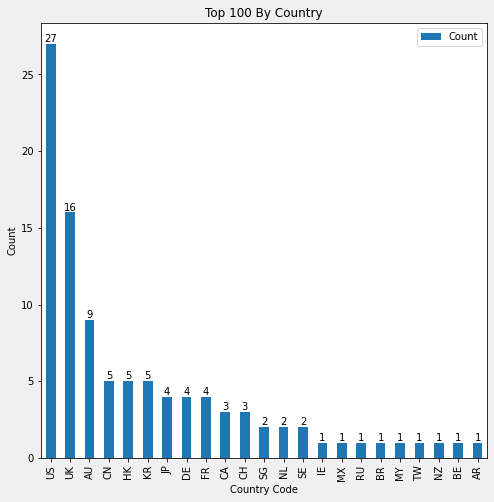

In [452]:
# Set Up
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8,8))
fig.set_facecolor('#f0f0f0') 

top_100 = df[:100]
top_100_by_country = top_100['Country Code'].value_counts().reset_index()
top_100_by_country.columns = ['Country Code', 'Count']
top_100_by_country.set_index('Country Code', inplace=True)
top_100_by_country.plot(kind='bar', y='Count', ylabel='Count', ax=axes, title='Top 100 By Country')
axes.bar_label(axes.containers[0])

plt.show()

QS also classifies institutions across five dimensions for the purposes of rankings comparison. 

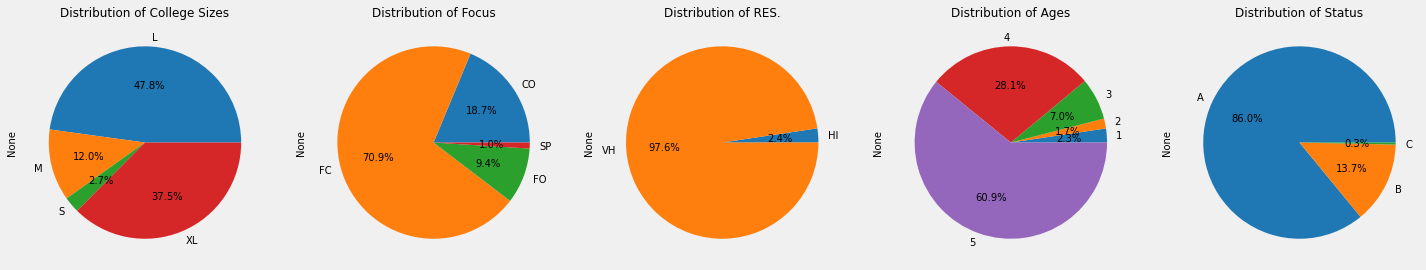

In [442]:
# SETUP Plots
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(25, 5))
fig.set_facecolor('#f0f0f0') 

# Classifications of Universities, Size, Focus, Res., Age, Status
size = df.groupby(by='SIZE').size() # Get counts 
focus = df.groupby(by='FOCUS').size() 
res = df.groupby(by='RES.').size()
age = df.groupby(by='AGE').size()
status = df.groupby(by='STATUS').size()


size.plot(kind='pie', ax=axes[0], title='Distribution of College Sizes', autopct='%1.1f%%')
focus.plot(kind='pie', ax=axes[1], title='Distribution of Focus', autopct='%1.1f%%')
res.plot(kind='pie', ax=axes[2], title='Distribution of RES.', autopct='%1.1f%%')
age.plot(kind='pie', ax=axes[3], title='Distribution of Ages', autopct='%1.1f%%')
status.plot(kind='pie', ax=axes[4], title='Distribution of Status', autopct='%1.1f%%')
plt.show()

del size, focus, res, age, status
# 


We can see the distribution of different classifications of the university using pie charts. The definiton of the categories can be found [here](https://support.qs.com/hc/en-gb/articles/360021876820-QS-Institution-Classifications). We can come to some conclusions.
1. A large majority of colleges in the data set are considered large, in other words, with a student body more than or equal to 1200
2. Most colleges have a focus/subject range of FC, or full comprehensive.
3. A large majority of colleges in the data have a very high level research intensity.
4. Most schools are over 100 years old.

Next, let's see how the rankings of university compare for the different categories such as 
1.  Academic Reputation Rank
2.  Employer Reuptation Rank
3.  Faculty Student Rank
4.  Citations per Faculty Rank
5.  International Faculty Rank
6.  International Students Rank
7.  International Research Network Rank
8.  Employment Outcomes Rank
9.  Sustainability Rank

At first I attempted a horizontal bar chart.

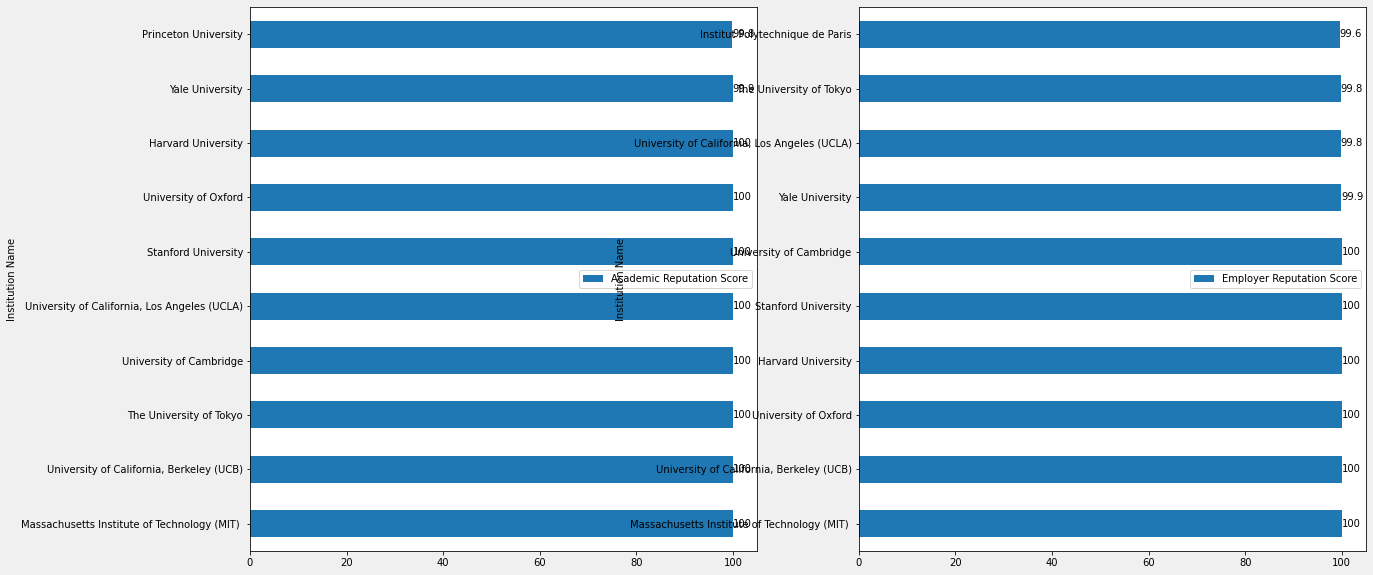

In [443]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
fig.set_facecolor('#f0f0f0') 

# Rank schools by 
academic_rep_score = df.sort_values(by='Academic Reputation Score', ascending=False)
academic_rep_score[:10].set_index('Institution Name').plot(kind='barh', y='Academic Reputation Score', ax=axes[0])
axes[0].bar_label(axes[0].containers[0])

employer_rep_score = df.sort_values(by='Employer Reputation Score', ascending=False)
# print(employer_rep_score[['Institution Name', 'Employer Reputation Score']])
employer_rep_score[:10].set_index('Institution Name').plot(kind='barh', y='Employer Reputation Score', ax=axes[1])
axes[1].bar_label(axes[1].containers[0])

del academic_rep_score, employer_rep_score

However, I found that graphing this way didn't give me a visualization that was useful. Instead, just sorting and printing out the top 10 was easier to read. Not all visualizations work!

In [444]:
for col in rank_col:
    print(col)
    ranking = df.sort_values(by=col, ascending=True)
    ranking = ranking[['Institution Name', col]][:10]
    print(ranking)
    

Academic Reputation Rank
                                Institution Name  Academic Reputation Rank
3                             Harvard University                       1.0
2                           University of Oxford                       2.0
1                        University of Cambridge                       3.0
0   Massachusetts Institute of Technology (MIT)                        4.0
4                            Stanford University                       5.0
9       University of California, Berkeley (UCB)                       6.0
28                       The University of Tokyo                       7.0
29  University of California, Los Angeles (UCLA)                       8.0
15                               Yale University                       9.0
17                          Princeton University                      10.0
Employer Reputation Rank
                                Institution Name  Employer Reputation Rank
3                             Harvard University  

Seeing the universities ordered by a single attribute, there are some unusual things we can pick out. For example, for `Faculty Student Rank`, the top 3 ranking are actually not in the top 300 schools (which our data set consists of). 

Perhaps, we can see the distribution of scores instead. 

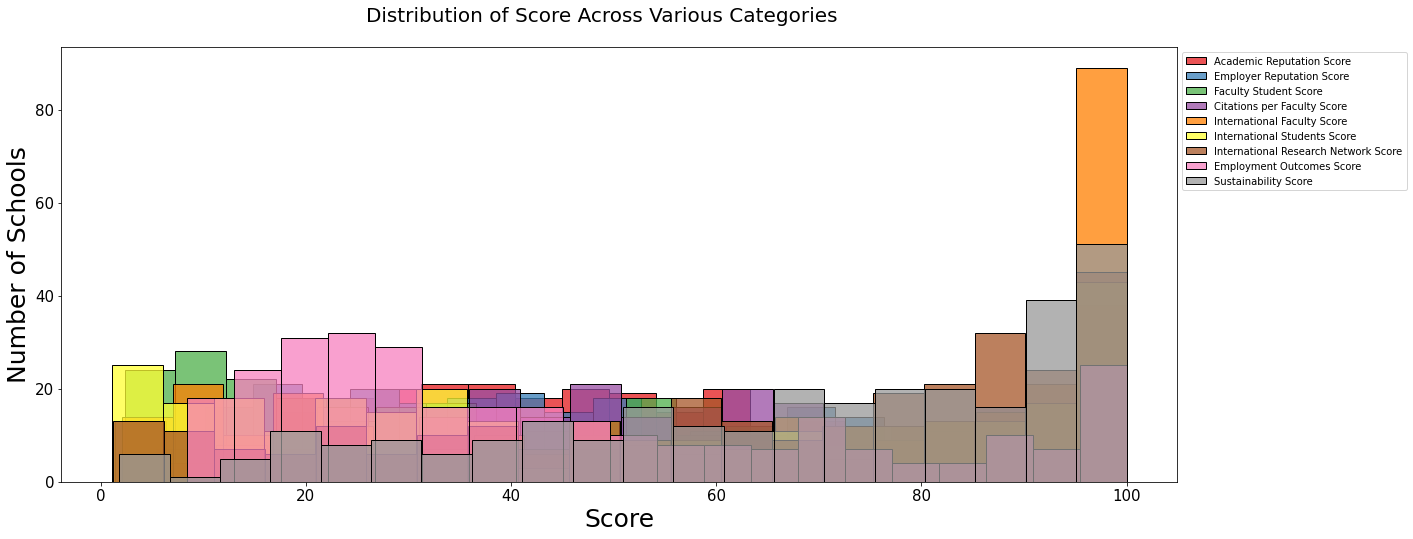

In [445]:
fig, ax = plt.subplots(figsize=(20,8))
for index, col in enumerate(score_col):
    sns.histplot(df[col], label=col, bins=20, kde =False, color = sns.color_palette("Set1")[index],ax=ax, multiple="stack")

ax.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.ylabel(ylabel = "Number of Schools", fontsize=25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel(xlabel= "Score", fontsize=25)
fig.suptitle('Distribution of Score Across Various Categories', fontsize=20, x = 0.5, y = 0.95)
plt.show()


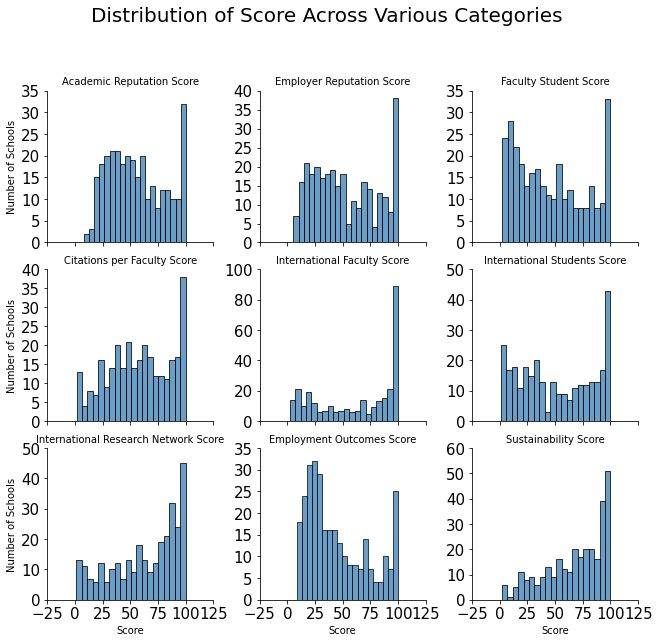

In [446]:
# Create a FacetGrid for multiple histograms side by side
g = sns.FacetGrid(df[score_col].melt(), col="variable", col_wrap=3, sharey=False, height=3)
g.map(sns.histplot, "value", bins=20, kde=False, color=sns.color_palette("Set1")[1])

# Customize plot appearance
g.set_axis_labels("Score", "Number of Schools")
g.set_titles(col_template="{col_name}")
g.set_xticklabels(fontsize=15)
g.set_yticklabels(fontsize=15)

# Add a common title
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Distribution of Score Across Various Categories', fontsize=20)

# Show the plot
plt.show()

We visualized the distribution together and each alone. We can see that for most score types, there is a majority of scores that are in the 90~100 range. This can mean that it is very probable that most schools have at least one strong suit. We can actually confirm this. 


In [447]:

at_least_one_high = df[(df["Academic Reputation Score"] > 90) |
    (df["Employer Reputation Score"] > 90) |
    (df["Faculty Student Score"] > 90) |
    (df["Citations per Faculty Score"] > 90) |
    (df["International Faculty Score"] > 90) |
    (df["International Students Score"] > 90) |
    (df["International Research Network Score"] > 90) |
    (df["Employment Outcomes Score"] > 90) |
    (df["Sustainability Score"] > 90) 
]
print(at_least_one_high.shape)


(229, 30)


Out of 300, 229 had at least one score type greater than 90.

Another useful EDA tatic is use the Radar Chart to see the performance of a single school in these various categories.

In [448]:
import plotly.express as px

def school_scores(institution_name) -> pd.DataFrame :
    institution_scores = df[df['Institution Name'] == institution_name][score_col].transpose()
    institution_scores.reset_index(inplace=True)
    institution_scores.columns = ['Score Type', 'Score']
    institution_scores['Score'] = institution_scores['Score'].astype(float)
    # print(institution_scores)
    return institution_scores


tsinghua = school_scores('Tsinghua University')
fig = px.line_polar(tsinghua, r='Score', theta='Score Type', title='Radar Chart For Tsinghua University', line_close=True)
fig.show()

We can see where the schools strength is and where it is strong. For example, Tsinghua's International scores are quite weak. This can either mean a smaller international faculty, students are less interested in studying abroad in Tsinghua, or more. Further analysis would have to be done to explain these rankings, but it is a good visualization to see the strenghts of a university based on the QS ranking standard. Let's look at some more.

In [449]:
mit = school_scores('Massachusetts Institute of Technology (MIT) ') # Rank 1
stanford = school_scores('Stanford University') # Rank 5
uni_of_tokyo = school_scores('The University of Tokyo') # Rank 28
uni_of_hk = school_scores('The University of Hong Kong') # Rank 26
fudan = school_scores('Fudan University') # Rank 50

mit['Model'] = 'MIT'
stanford['Model'] = 'Stanford'
uni_of_tokyo['Model'] = 'University of Tokyo'
uni_of_hk['Model'] = 'The University of Hong Kong'
fudan['Model'] = 'Fudan University'

all_uni = pd.concat([mit, stanford, uni_of_tokyo, uni_of_hk, fudan], axis=0)
# all_uni['Score'] = all_uni['Score'].max() - all_uni['Score']
# print(all_uni)

fig = px.line_polar(all_uni, r='Score', theta='Score Type', color='Model', 
                    title='Radar Chart for Schools',  
                    template="plotly_dark", line_close=True)
fig.show()

# Create two scatter plots using Plotly Express
# line_polar_1 = px.line_polar(mit, r='Score', theta='Score Type', title='Radar Chart For MIT', line_close=True)
# line_polar_2 = px.line_polar(stanford, r='Score', theta='Score Type', title='Radar Chart For Stanford', line_close=True)
# line_polar_3 = px.line_polar(uni_of_tokyo, r='Score', theta='Score Type', title='Radar Chart For Stanford', line_close=True)


This is a nice way to compare the strenghts of certain colleges. For example, MIT is ahead of Stanford in terms of ranking may largely be due to the fact that it has a stronger International Students Score. Thus, in order to improve the score, Stanford may want to focus on it's international student body more often. 

Another trend I began to notice that as you move down the rankings, the Academic Reputation Score characteristic remained the most steady. In other words, while the scores of other categories dropped and varied significantly, the academic reputation score remained higher. This may suggest that Academic Reputation Score has a large impact on the overall rankings. A quick look at https://support.qs.com/hc/en-gb/articles/4405955370898-QS-World-University-Rankings-, shows that this is indeed the case. Academic reputation score represents 30% of the overal score! In fact, let's see if we can prove this!

## Step: 3 Data Analysis

Academic Reputation Score: 30.01%
Employer Reputation Score: 14.98%
Faculty Student Score: 10.00%
Citations per Faculty Score: 20.00%
International Faculty Score: 5.00%
International Students Score: 5.01%
International Research Network Score: 5.00%
Employment Outcomes Score: 5.00%
Sustainability Score: 5.00%


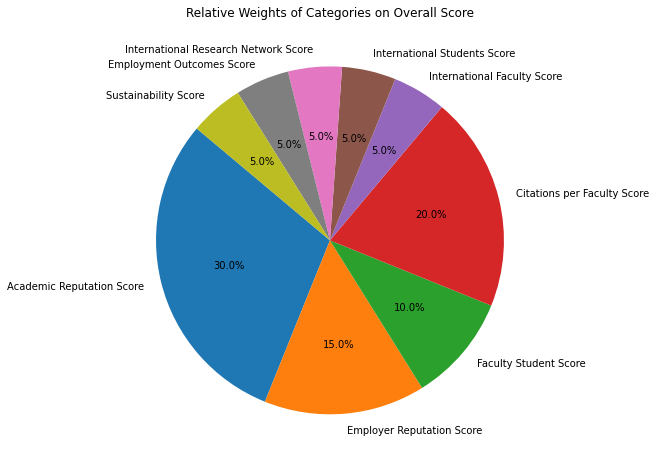

In [450]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df[score_col] # Features (independent variables)
y = df['Overall SCORE'] # Target variable (dependent variable)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression() # Initialize the linear regression model
model.fit(X_train, y_train) # Train the model
category_weights = model.coef_ # Get the learned coefficients (weights)

# Normalize the weights to sum up to 1 (for relative weights)
sum_weights = sum(category_weights)
relative_weights = category_weights / sum_weights

# Print the relative weights of each category
for i, category in enumerate(score_col):
    print(f"{category}: {relative_weights[i]:.2%}")
    

plt.figure(figsize=(8, 8))
plt.gca().set_facecolor('white')
plt.pie(relative_weights, labels=score_col, autopct='%.1f%%', startangle=140)
plt.title('Relative Weights of Categories on Overall Score')
plt.show()

A good article explaining linear regression and its learned coefficents can be found here [here](https://christophm.github.io/interpretable-ml-book/limo.html). But in general, a linear relationship with multible variables represented as 

$$ y = β_0 + β_1x_1 + \cdots + β_px_p + ϵ $$

The $\beta$'s represent our coefficients. We have proved that the coefficients match the ones described in the QS documentation.

Perhaps another way to test the strength of the correlation between each `Score` column the `Overall SCORE` column is through the Pearson correlation.

Academic Reputation Score               0.862012
Employer Reputation Score               0.699860
Faculty Student Score                   0.392729
Citations per Faculty Score             0.441857
International Faculty Score             0.256317
International Students Score            0.411986
International Research Network Score    0.371779
Employment Outcomes Score               0.604636
Sustainability Score                    0.383236
Overall SCORE                           1.000000
Name: Overall SCORE, dtype: float64


<AxesSubplot:>

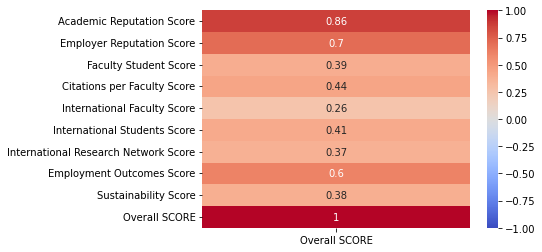

In [451]:
pearson_corr = df[(score_col + ['Overall SCORE'])].corr()['Overall SCORE']
print(pearson_corr)

sns.heatmap(pearson_corr.to_frame(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)

We see again that the `Academic Reputation Score` has the strongest correlation!

## Step 5: Conclusions
Although there is much much more you can do with this data set, this case studied explored this data set with some basic data visualization principles and techniques. This helped give me a better understanding of how universities are classified (`Size`, `Focus`, etc) and how certain features contribute to the overall ranking of the University. 

## Further Topics/Notes
These are some topics that can be explored.
1. Compare regions using country code. How many schools in each reigion (Asia, Middle East, etc...)
2. Comparing 2023 and 2024 Stats. See how many new schools entered top 1500, 500, 100, etc.
3. Clean the data set.
